In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [15]:
#loading data file
Train=pd.read_csv(r'C:\Users\Csp\Desktop\New folder (2)\train.csv')
Test=pd.read_csv(r'C:\Users\Csp\Desktop\New folder (2)\test.csv')


In [16]:
print("Rows     : ", Train.shape[0])
print("Columns  : ", Train.shape[1])
print("\nFeatures : \n", Train.columns.tolist())
print("\nMissing values :  ", Train.isnull().sum().values.sum())
print("\nUnique values :  \n", Train.nunique())

print("Test", Test.shape, "Train", Train.shape)

Rows     :  1168
Columns  :  81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

In [17]:
# Get a summary of all features in the data and their types
Train.info()

# Remove duplicates from training data
Train.duplicated(subset=None, keep="first")
print("Test", Test.shape, "Train", Train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [18]:
# next I'll check for missing values in training data
pd.options.display.min_rows = 115
Train.isnull().sum().sort_values(ascending=False)

print("Test", Test.shape, "Train", Train.shape)

Test (292, 80) Train (1168, 81)


In [19]:
# Lets get info on the missing values and decide what we will do with them

missing = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "LotFrontage",
    "GarageCond",
    "GarageType",
    "GarageYrBlt",
    "GarageFinish",
    "GarageQual",
    "BsmtExposure",
    "BsmtFinType2",
    "BsmtFinType1",
    "BsmtCond",
    "BsmtQual",
    "MasVnrArea",
    "MasVnrType",
    "Electrical",
]

Train[missing].info()

# Assume poolQC missing values are due to property not having pool (which makes sense for the data )
values = {
    "PoolQC": "No Pool",
    "MiscFeature": "No Feature",
    "Alley": "No alley access",
    "Fence": "No Fence",
    "FireplaceQu": "No Fireplace",
    "GarageCond": "No Garage",
    "GarageType": "No Garage",
    "GarageArea": 0,
    "GarageYrBlt": "None built",
    "GarageFinish": "No Garage",
    "GarageQual": "No Garage",
    "BsmtExposure": "No Basement",
    "BsmtFinType2": "Not Applicable",
    "BsmtFinType1": "Not Applicable",
    "BsmtCond": "No Basement",
    "BsmtQual": "No Basement",
    "MasVnrArea": 0,
    "MasVnrType": "No Veneer",
    "LotFrontage": 0,
}

Train.fillna(value=values, inplace=True)
Test.fillna(value=values, inplace=True)

Train.isna().sum().sort_values(ascending=False)

# for other missing categories we will replace with the mode
features = Train.select_dtypes(include=["object"]).columns

for features in features:
    Train[features].fillna(Train[features].mode()[0], inplace=True)
    Test[features].fillna(Test[features].mode()[0], inplace=True)


# some basement values are set to NANs when they should be zero
Basementmetrics = [
    "BsmtHalfBath",
    "BsmtFullBath",
    "BsmtFinSF1",
    "GarageCars",
    "TotalBsmtSF",
    "BsmtUnfSF",
    "BsmtFinSF2",
]

for Basementmetrics in Basementmetrics:
    Test.loc[(Test[Basementmetrics].isnull()), Basementmetrics] = 0
    Train.loc[(Train[Basementmetrics].isnull()), Basementmetrics] = 0

# mising info for Garage cars should be replaced
Test.loc[(Test.GarageCars.isnull()), "GarageCars"] = 0
Train.loc[(Train.GarageCars.isnull()), "GarageCars"] = 0


print("Test", Test.shape, "Train", Train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   44 non-null     object 
 2   Alley         77 non-null     object 
 3   Fence         237 non-null    object 
 4   FireplaceQu   617 non-null    object 
 5   LotFrontage   954 non-null    float64
 6   GarageCond    1104 non-null   object 
 7   GarageType    1104 non-null   object 
 8   GarageYrBlt   1104 non-null   float64
 9   GarageFinish  1104 non-null   object 
 10  GarageQual    1104 non-null   object 
 11  BsmtExposure  1137 non-null   object 
 12  BsmtFinType2  1137 non-null   object 
 13  BsmtFinType1  1138 non-null   object 
 14  BsmtCond      1138 non-null   object 
 15  BsmtQual      1138 non-null   object 
 16  MasVnrArea    1161 non-null   float64
 17  MasVnrType    1161 non-null   object 
 18  Electrical    1168 non-null 

In [20]:
# Change variable types

# Year built is currently an integer we should treat this as a category for the purpose of this task

Train.YearBuilt = Train.YearBuilt.astype(str)
Test.YearBuilt = Test.YearBuilt.astype(str)

Train.YrSold = Train.YrSold.astype(str)
Test.YrSold = Test.YrSold.astype(str)

Train.GarageYrBlt = Train.GarageYrBlt.astype(str)
Test.GarageYrBlt = Test.GarageYrBlt.astype(str)

Train.YearRemodAdd = Train.YearRemodAdd.astype(str)
Test.YearRemodAdd = Test.YearRemodAdd.astype(str)


# MSSUbCLass, Overallcond & OverallQual: we will decode this to avoid numeric mix-up
MSSUbCLass = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}


OverallQualCond = {
    10: "Very Excellent",
    9: "Excellent",
    8: "Very Good",
    7: "Good",
    6: "Above Average",
    5: "Average",
    4: "Below Average",
    3: "Fair",
    2: "Poor",
    1: "Very Poor",
}


Train.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)
Test.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)


print("Test", Test.shape, "Train", Train.shape)

Test (292, 80) Train (1168, 81)


In [23]:
#EDA
# let's do some descriptive statistics on our data to make sure nothing looks unusual
pd.set_option("display.max_columns", None)
Train.describe()
# Train.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,57.982021,10484.749144,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,181477.005993
std,416.159877,35.471226,8957.442311,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,79105.586863
min,1.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,360.500000,41.750000,7621.500000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,130375.000000
50%,714.500000,64.000000,9522.500000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163995.000000
75%,1079.500000,79.250000,11515.500000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000
max,1460.000000,313.000000,164660.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


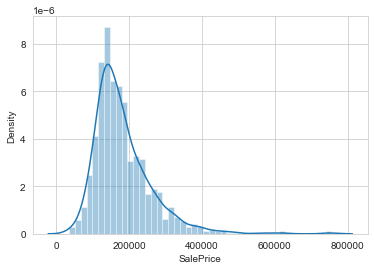

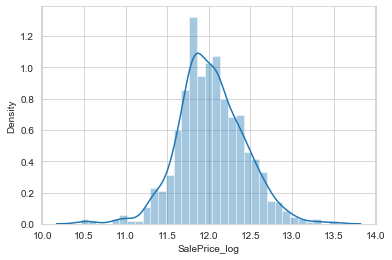

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

x = Train.SalePrice
sns.set_style("whitegrid")
sns.distplot(x)
plt.show()

Train["SalePrice_log"] = np.log(Train.SalePrice)
x = Train.SalePrice_log
sns.distplot(x)
plt.show()

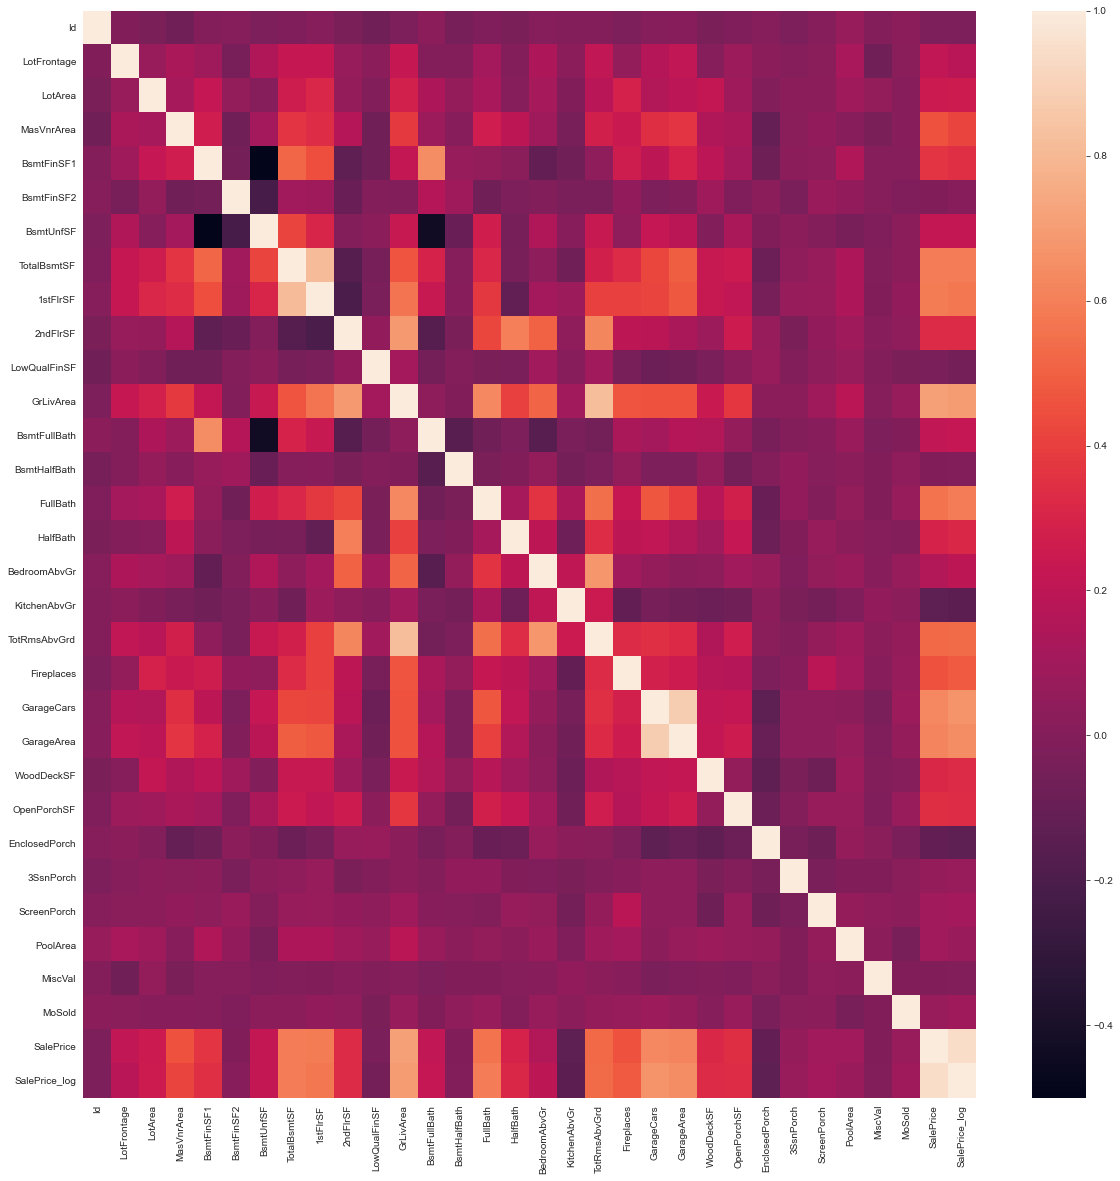

In [25]:
# Lets explore the correlations in our data set
plt.figure(figsize=(20, 20))
sns.heatmap(Train.corr())
plt.savefig("pearsonsmep.png")

<Figure size 720x720 with 0 Axes>

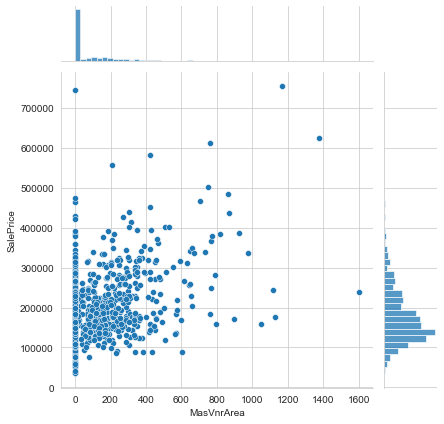

<Figure size 720x720 with 0 Axes>

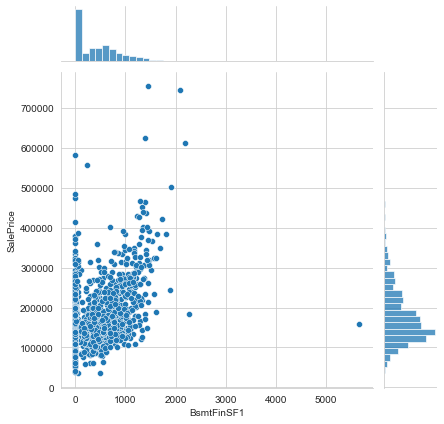

<Figure size 720x720 with 0 Axes>

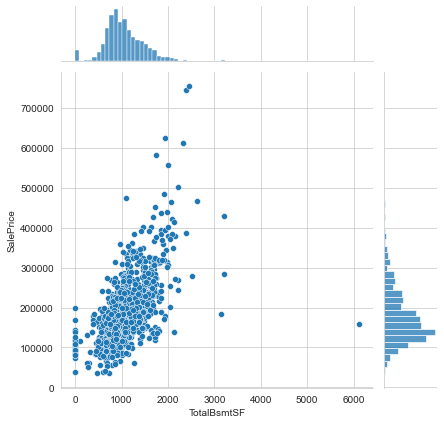

<Figure size 720x720 with 0 Axes>

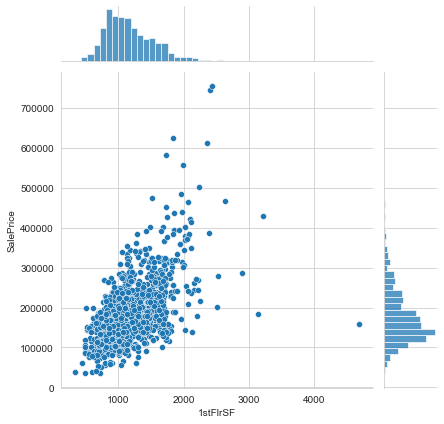

<Figure size 720x720 with 0 Axes>

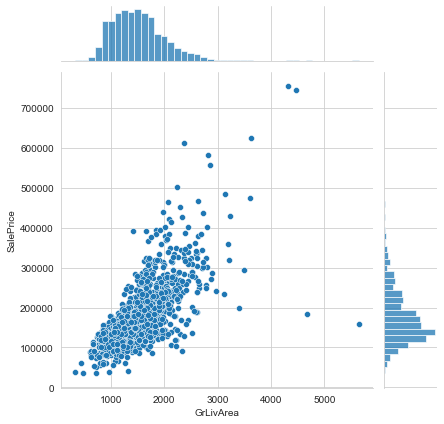

<Figure size 720x720 with 0 Axes>

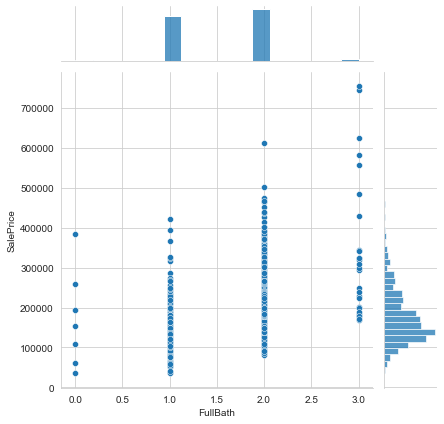

<Figure size 720x720 with 0 Axes>

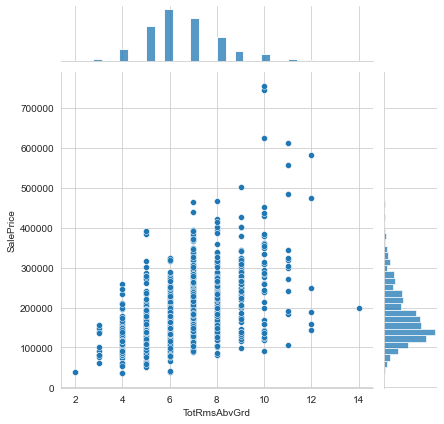

<Figure size 720x720 with 0 Axes>

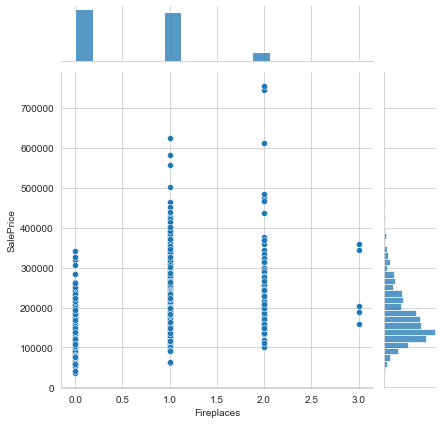

<Figure size 720x720 with 0 Axes>

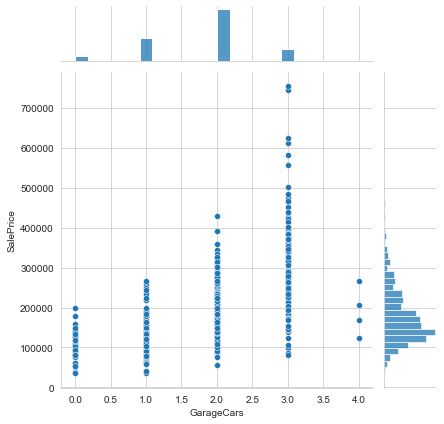

<Figure size 720x720 with 0 Axes>

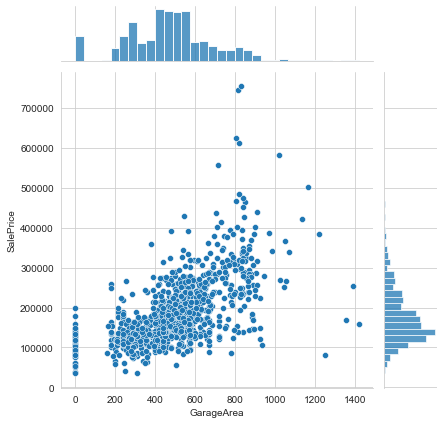

<Figure size 720x720 with 0 Axes>

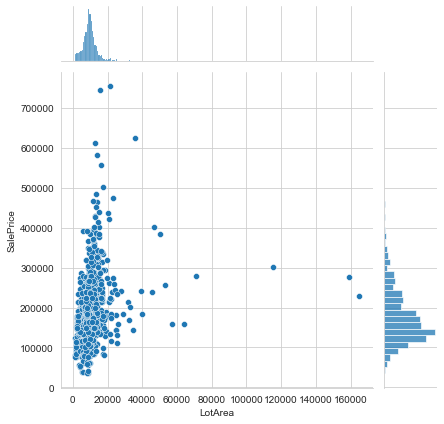

<Figure size 720x720 with 0 Axes>

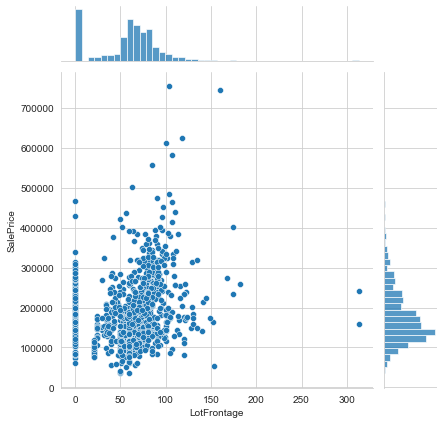

In [26]:
# We will plot some joint histogram and scatter grphs to look at correlated features in more detail
y = Train.SalePrice
features = [
    "MasVnrArea",
    "BsmtFinSF1",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "FullBath",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "GarageArea",
    "LotArea",
    "LotFrontage",
]

for features in features:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = Train[features]
    sns.jointplot(x=x, y=y, data=Train)

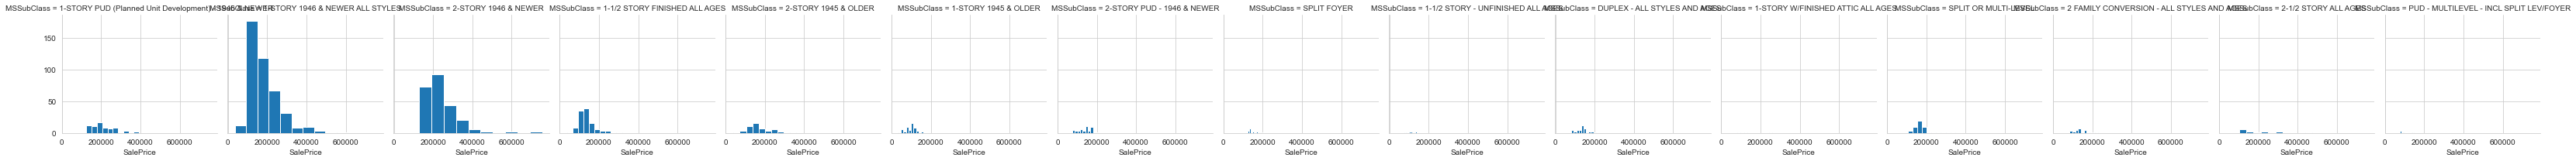

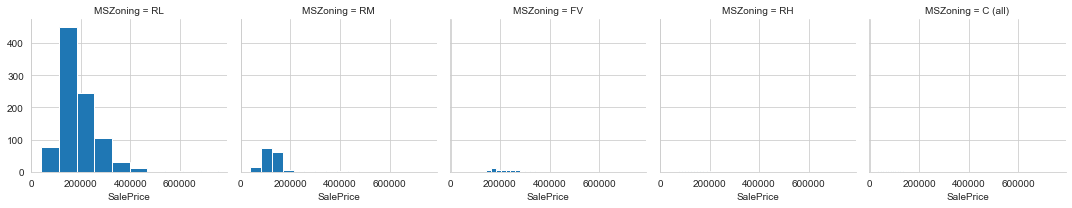

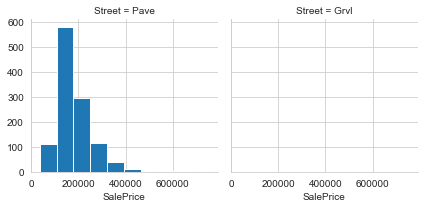

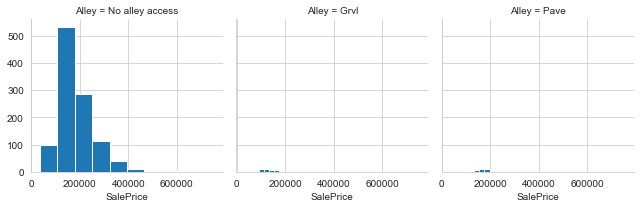

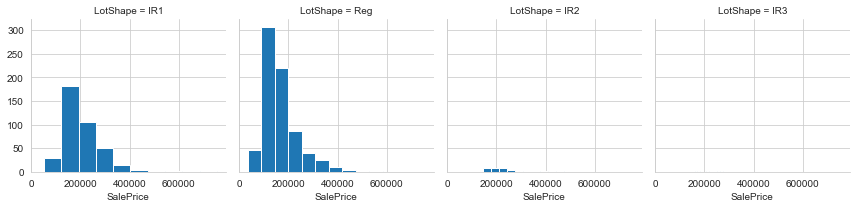

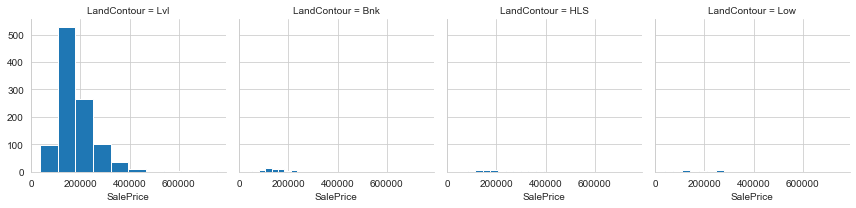

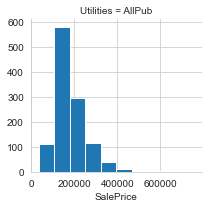

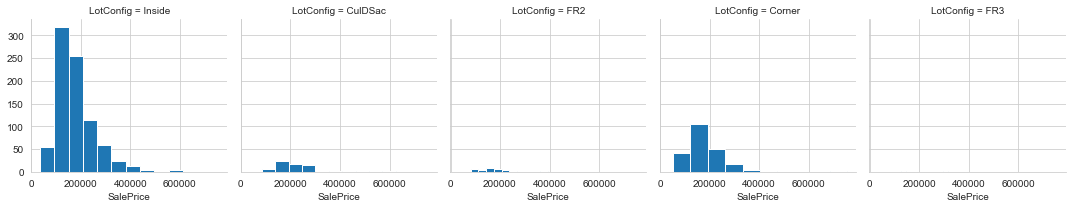

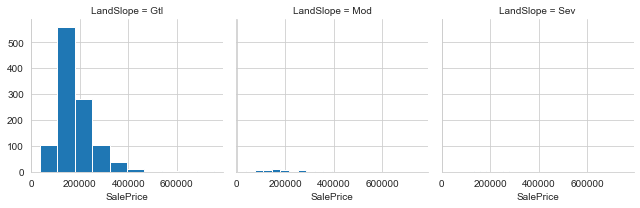

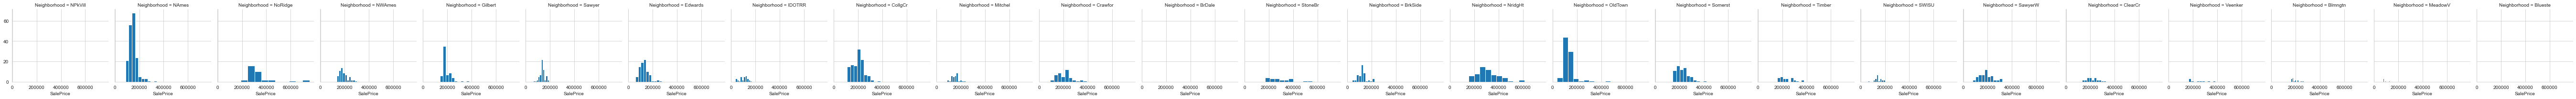

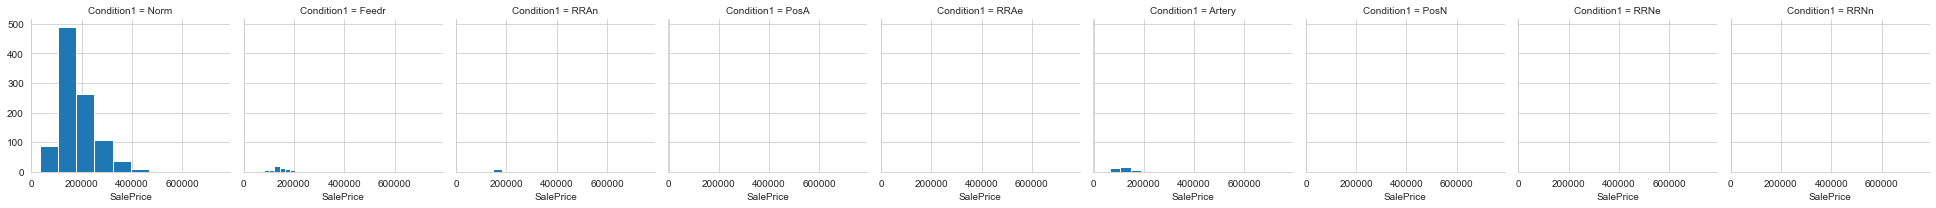

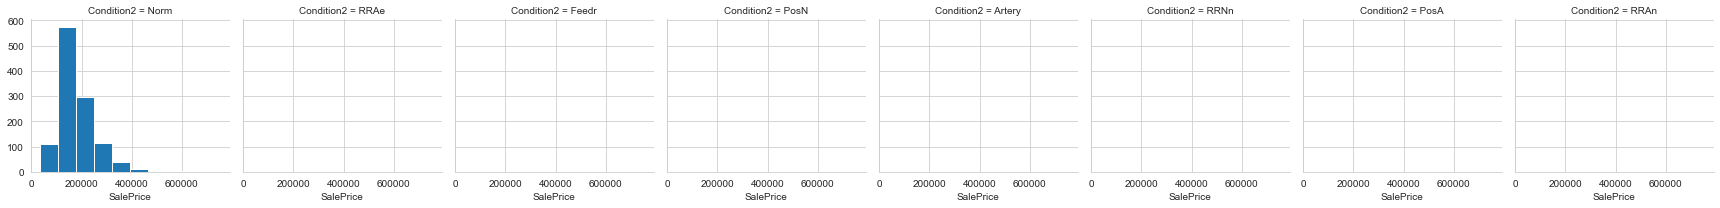

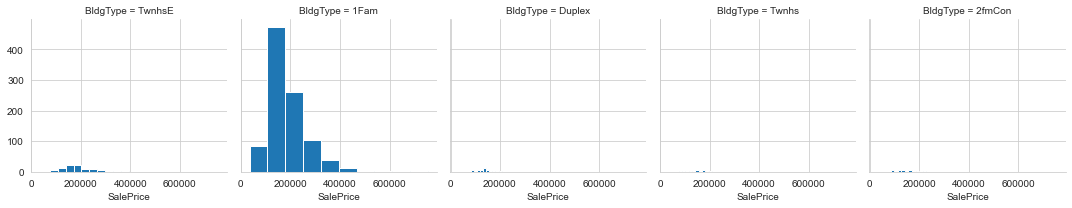

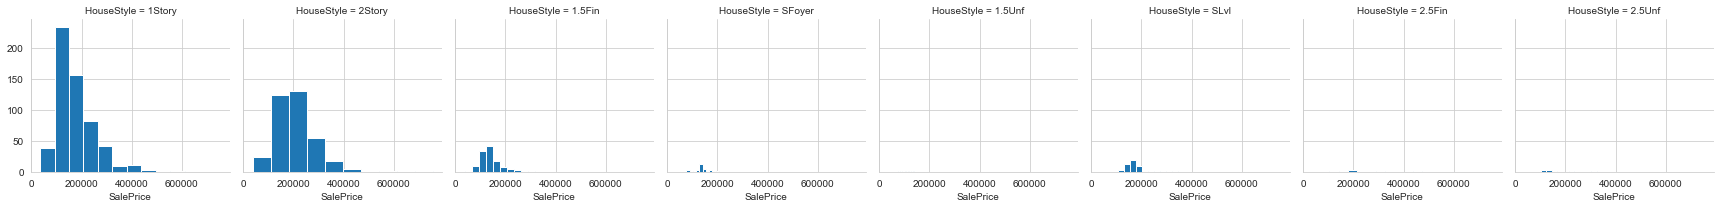

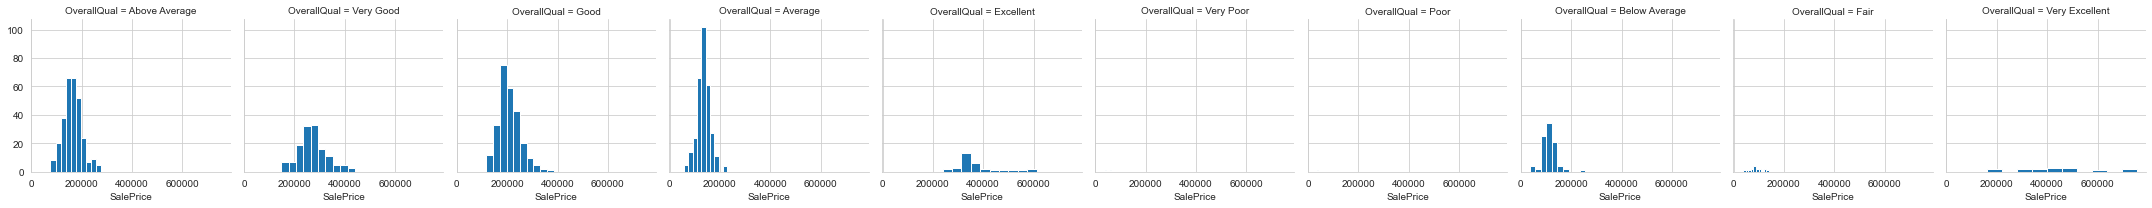

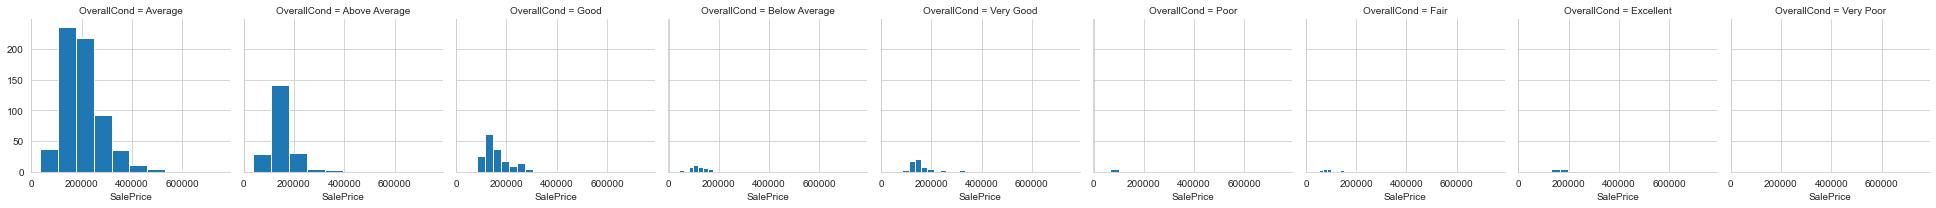

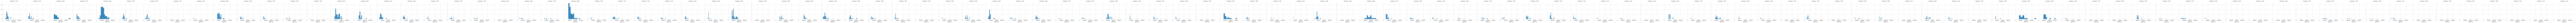

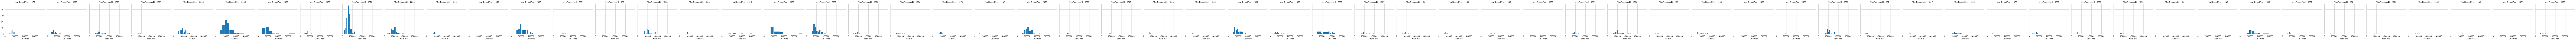

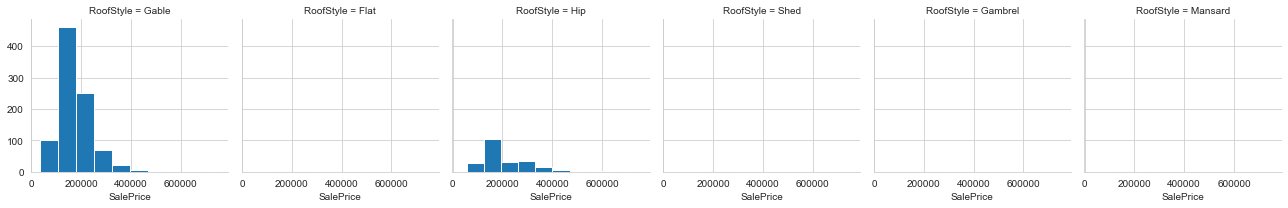

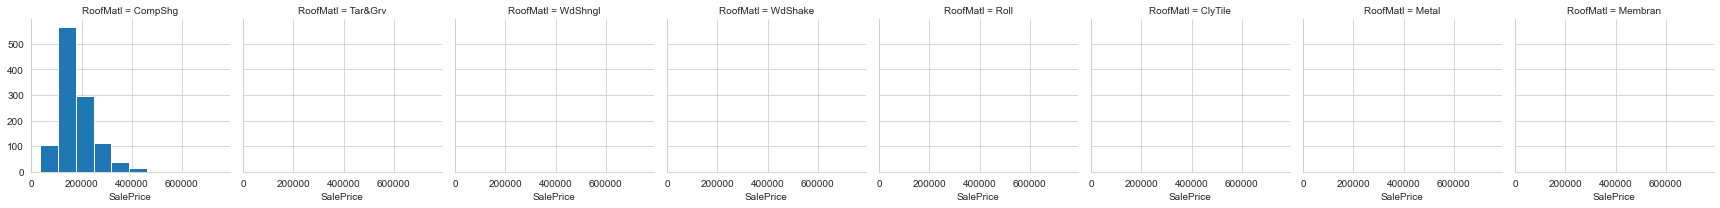

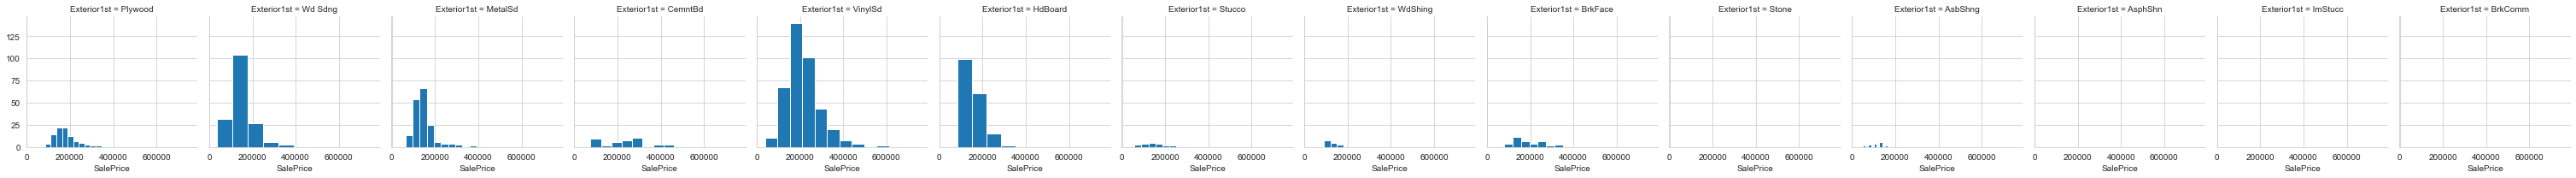

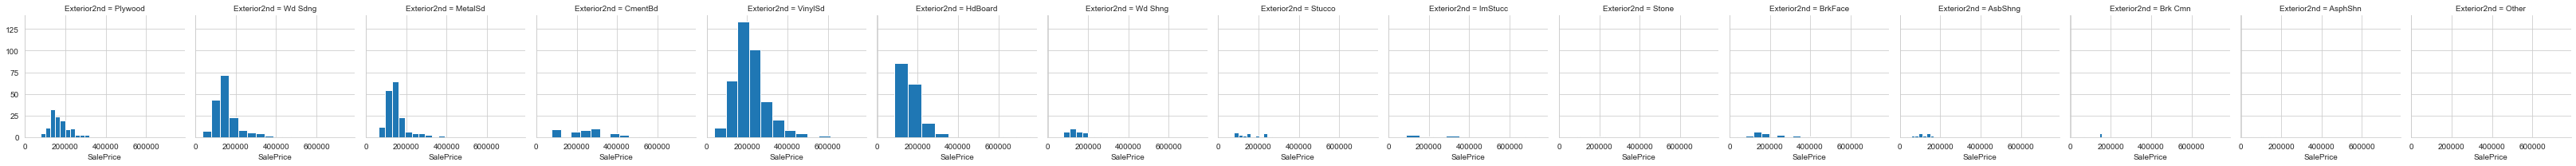

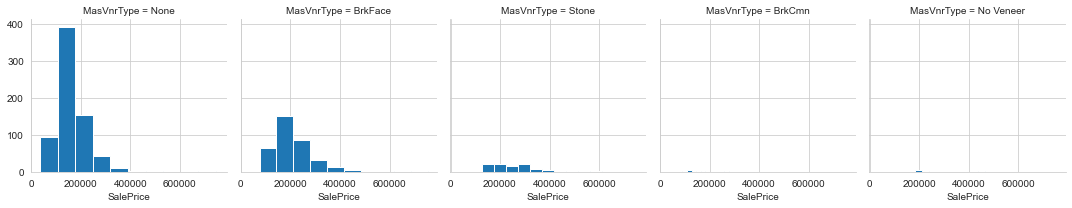

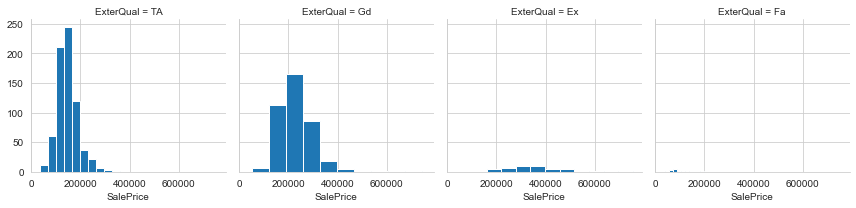

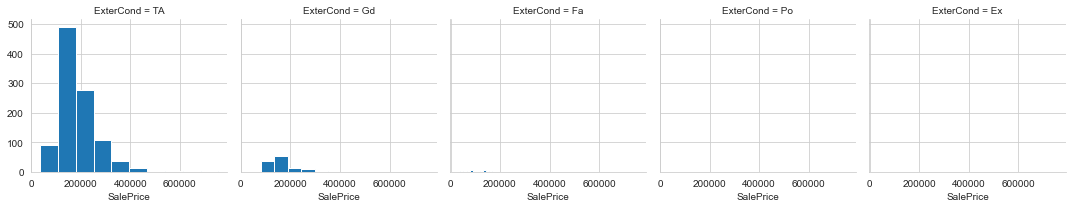

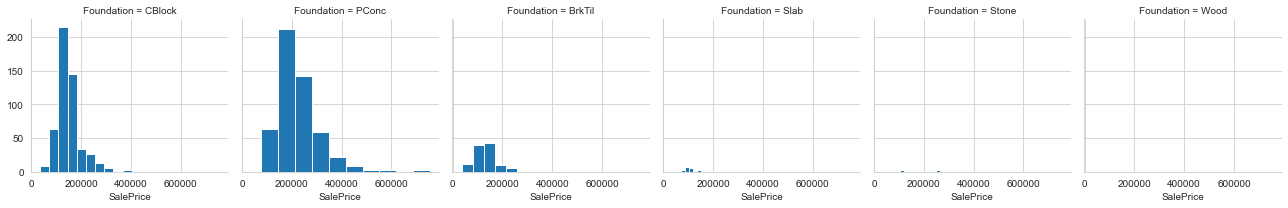

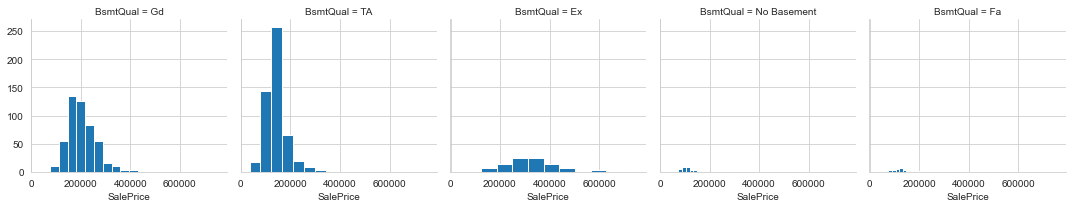

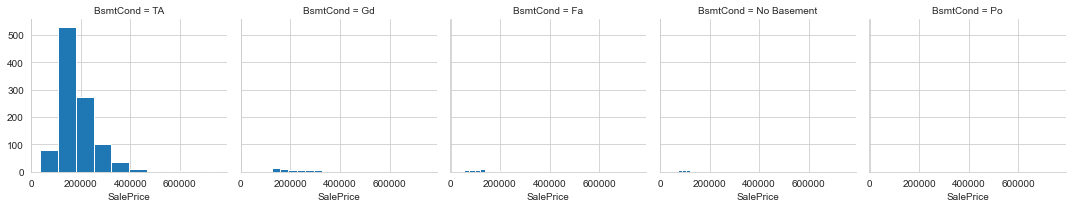

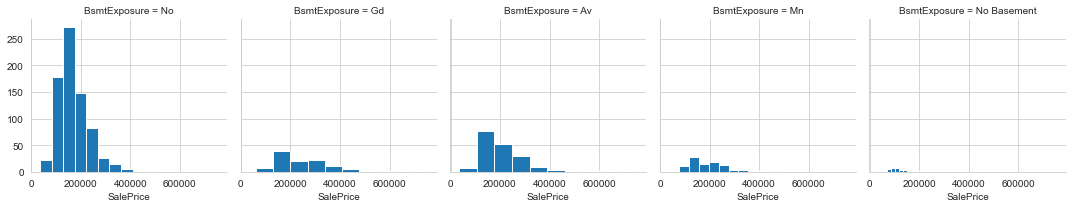

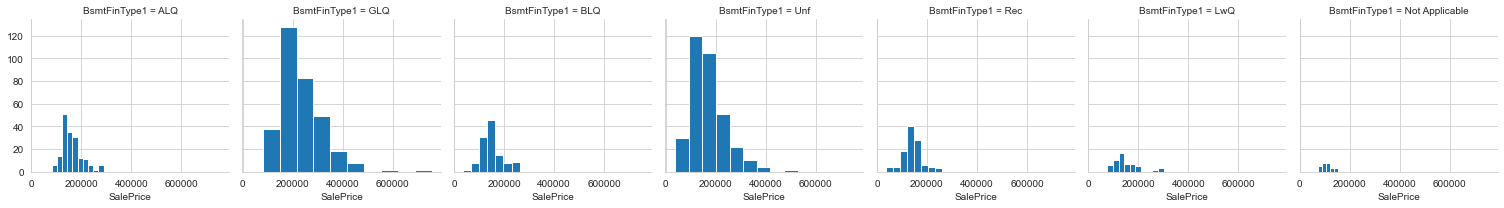

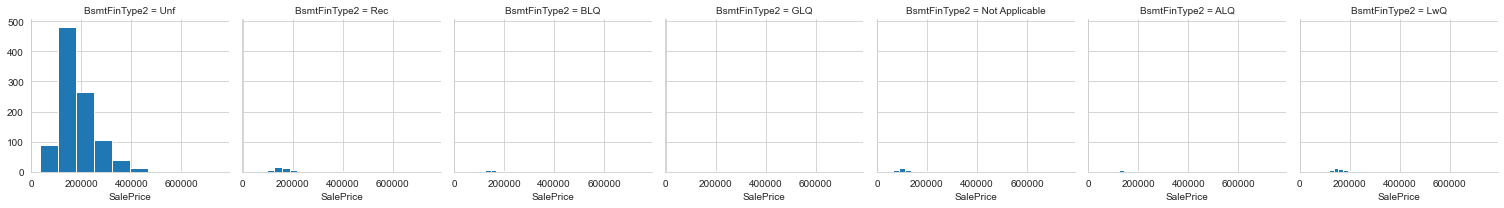

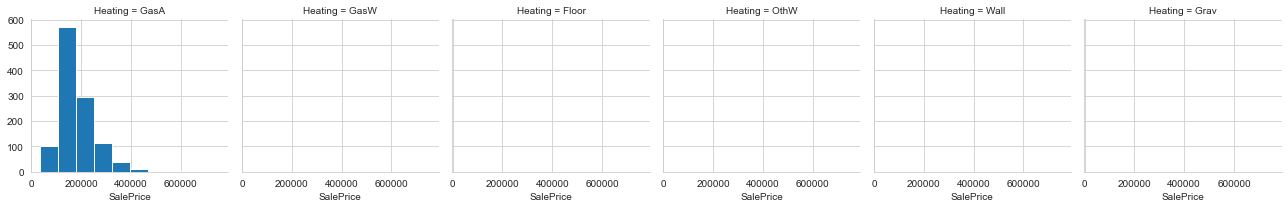

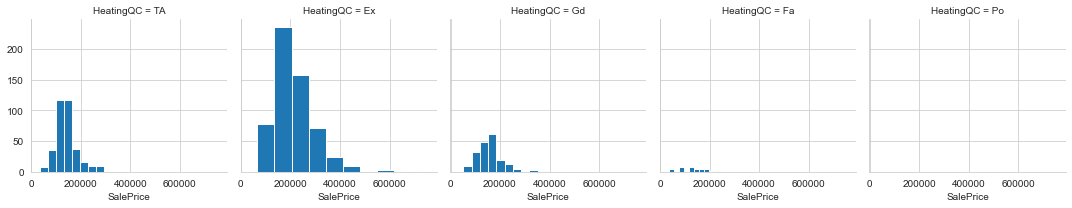

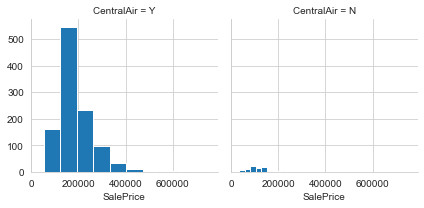

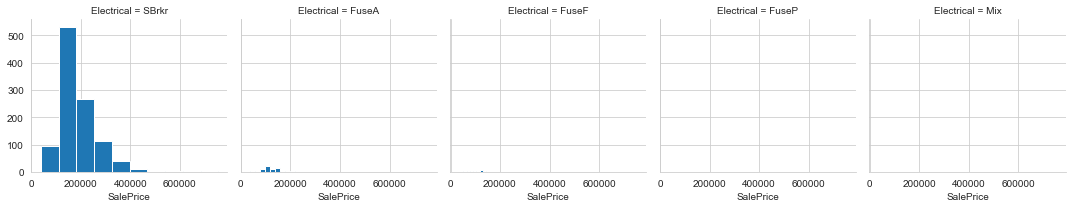

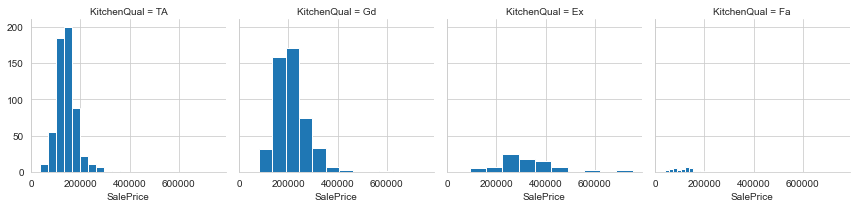

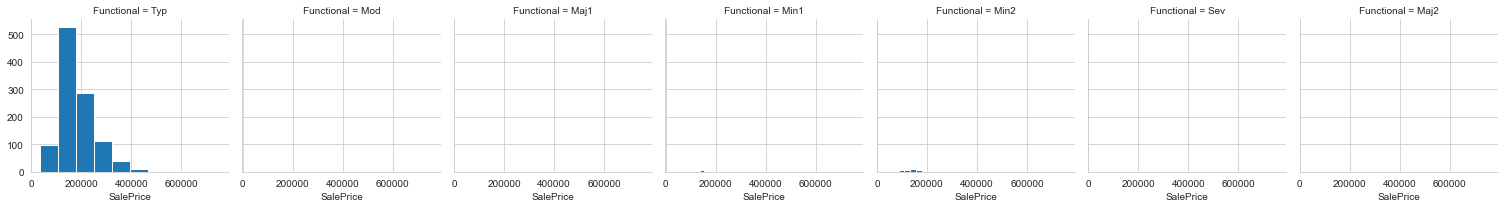

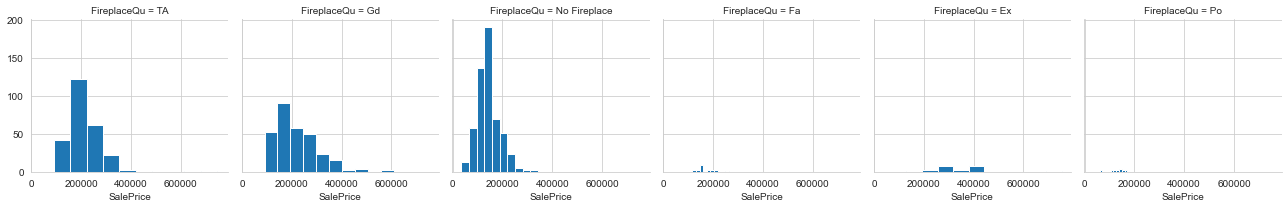

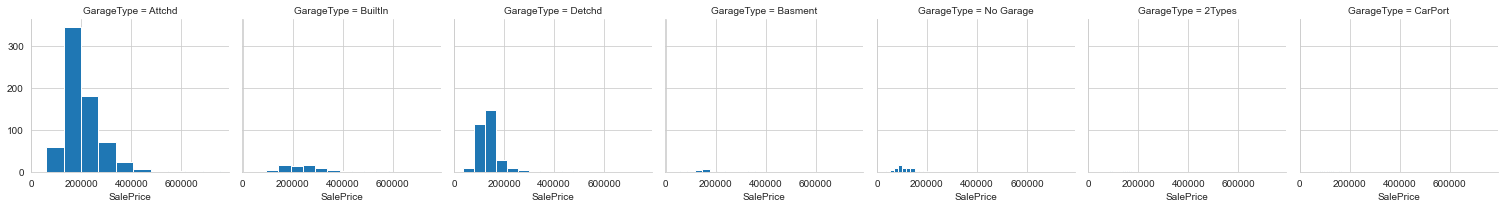

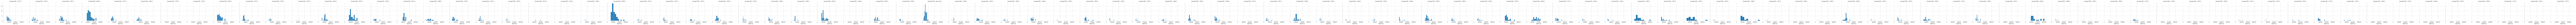

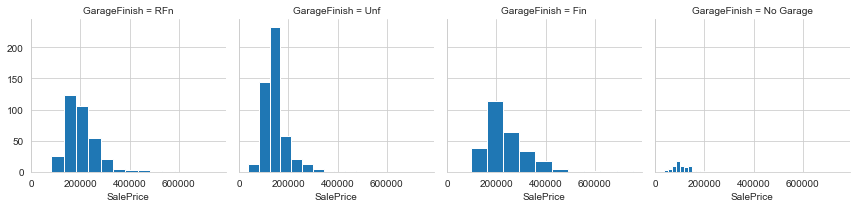

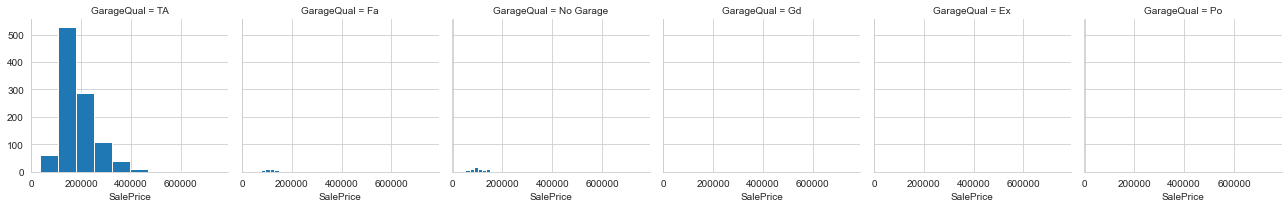

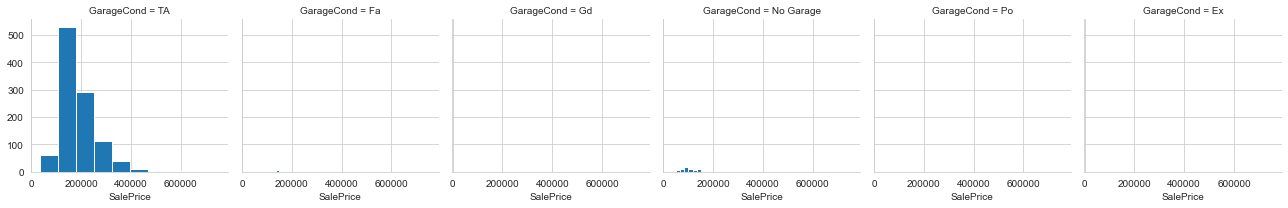

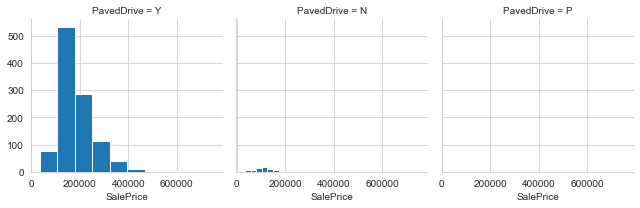

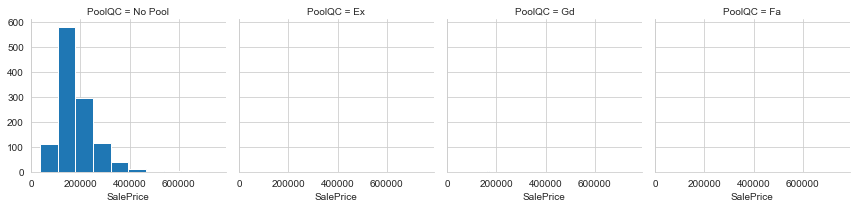

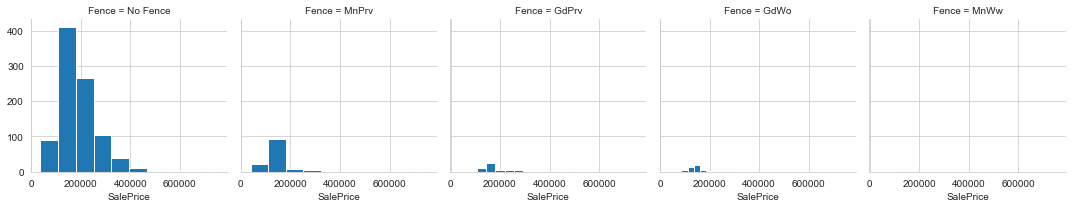

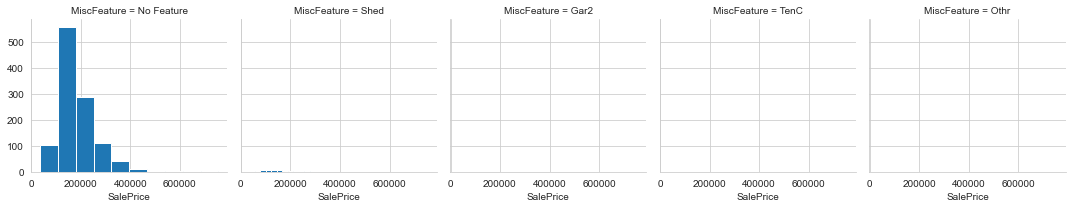

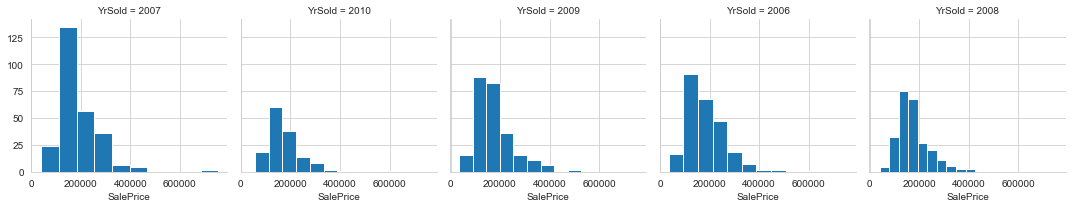

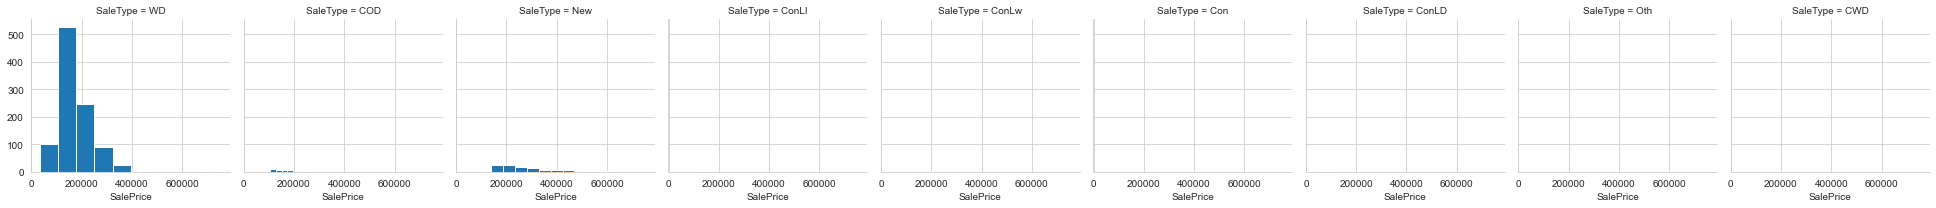

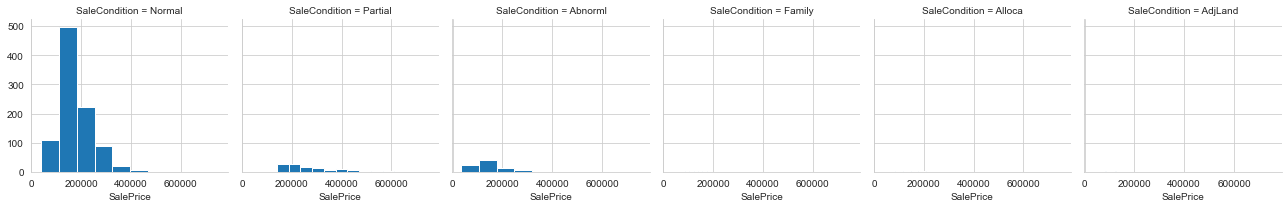

In [27]:
# Perform analysis for categorical vairbales

# Nothin looks untoward, sale prices look approximately normally distirbuted across each category

features = Train.select_dtypes(include=['object']).columns

for features in features:
    g = sns.FacetGrid(Train, col=features)
    g.map(plt.hist, 'SalePrice');

In [28]:
# Convert training and test data to one hot encoded numeric data
import sklearn
# Create a onehotencoder object that relables columns after transforming
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder


# Wrapper for one hot encoder to allow labelling of encoded variables
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(
            sparse_matrix.toarray(), columns=new_columns, index=X.index
        )
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f"{column}_<{self.categories_[i][j]}>")
                j += 1
        return new_columns


# Define funtion to encode categorrical variables with and rejoin to initial data


def transform(Train, df):

    # isolate categorical features
    cat_columns = df.select_dtypes(include=["object"]).columns
    cat_df = df[cat_columns]

    # isolate the numeric features
    numeric_df = df.select_dtypes(include=np.number)

    # initialise one hot encoder object spcify handle unknown and auto options to keep test and train same size
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    # Fit the endcoder to training data
    ohe.fit(Train[cat_columns])

    # transform input data
    df_processed = ohe.transform(cat_df)

    # concatinate numeric features from orginal tables with encoded features
    df_processed_full = pd.concat([df_processed, numeric_df], axis=1)

    return df_processed_full


# Transform training data to numeric form
Train_encoded = transform(Train, Train)
# Transform test data to numeric form
Test_encoded = transform(Train, Test)

# Check data sets are same width minus the two labels in Train
print("Test", Test_encoded.shape, "Train", Train_encoded.shape)

Test (292, 602) Train (1168, 604)


In [29]:
# Model 0: Decision Tree
import time

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

x_train = Train_encoded.drop(columns=["Id", "SalePrice", "SalePrice_log"])
Y_train = Train_encoded.SalePrice_log


# Initialise Gridsearch CV with 5 fold corssvalidation and root mse for socirn


def model_pipeline(model, param_grid, scoring):
    Tuned_Model = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring=scoring, cv=5
    )

    # Fit model & Time the process for training the model
    print("running model")
    start_time = time.process_time()

    Tuned_Model.fit(x_train, Y_train)

    # End of fit time
    print(time.process_time() - start_time, "Seconds")
    print("finished running model")
    return Tuned_Model


# Generate results of best run


def plot_mean_scores(Tuned_Model, col, x, y, name):

    Results = pd.DataFrame(Tuned_Model.cv_results_)
    Results_Best = Results.loc[Results.rank_test_score == 1]

    # Initialize a grid of plots
    sns.set(font_scale=1.5)
    sns.set_style("darkgrid")
    col = col
    for col in col:
        grid = sns.FacetGrid(
            Results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=15,
        )

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot, x, y, marker="o", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)

running model
6.578125 Seconds
finished running model


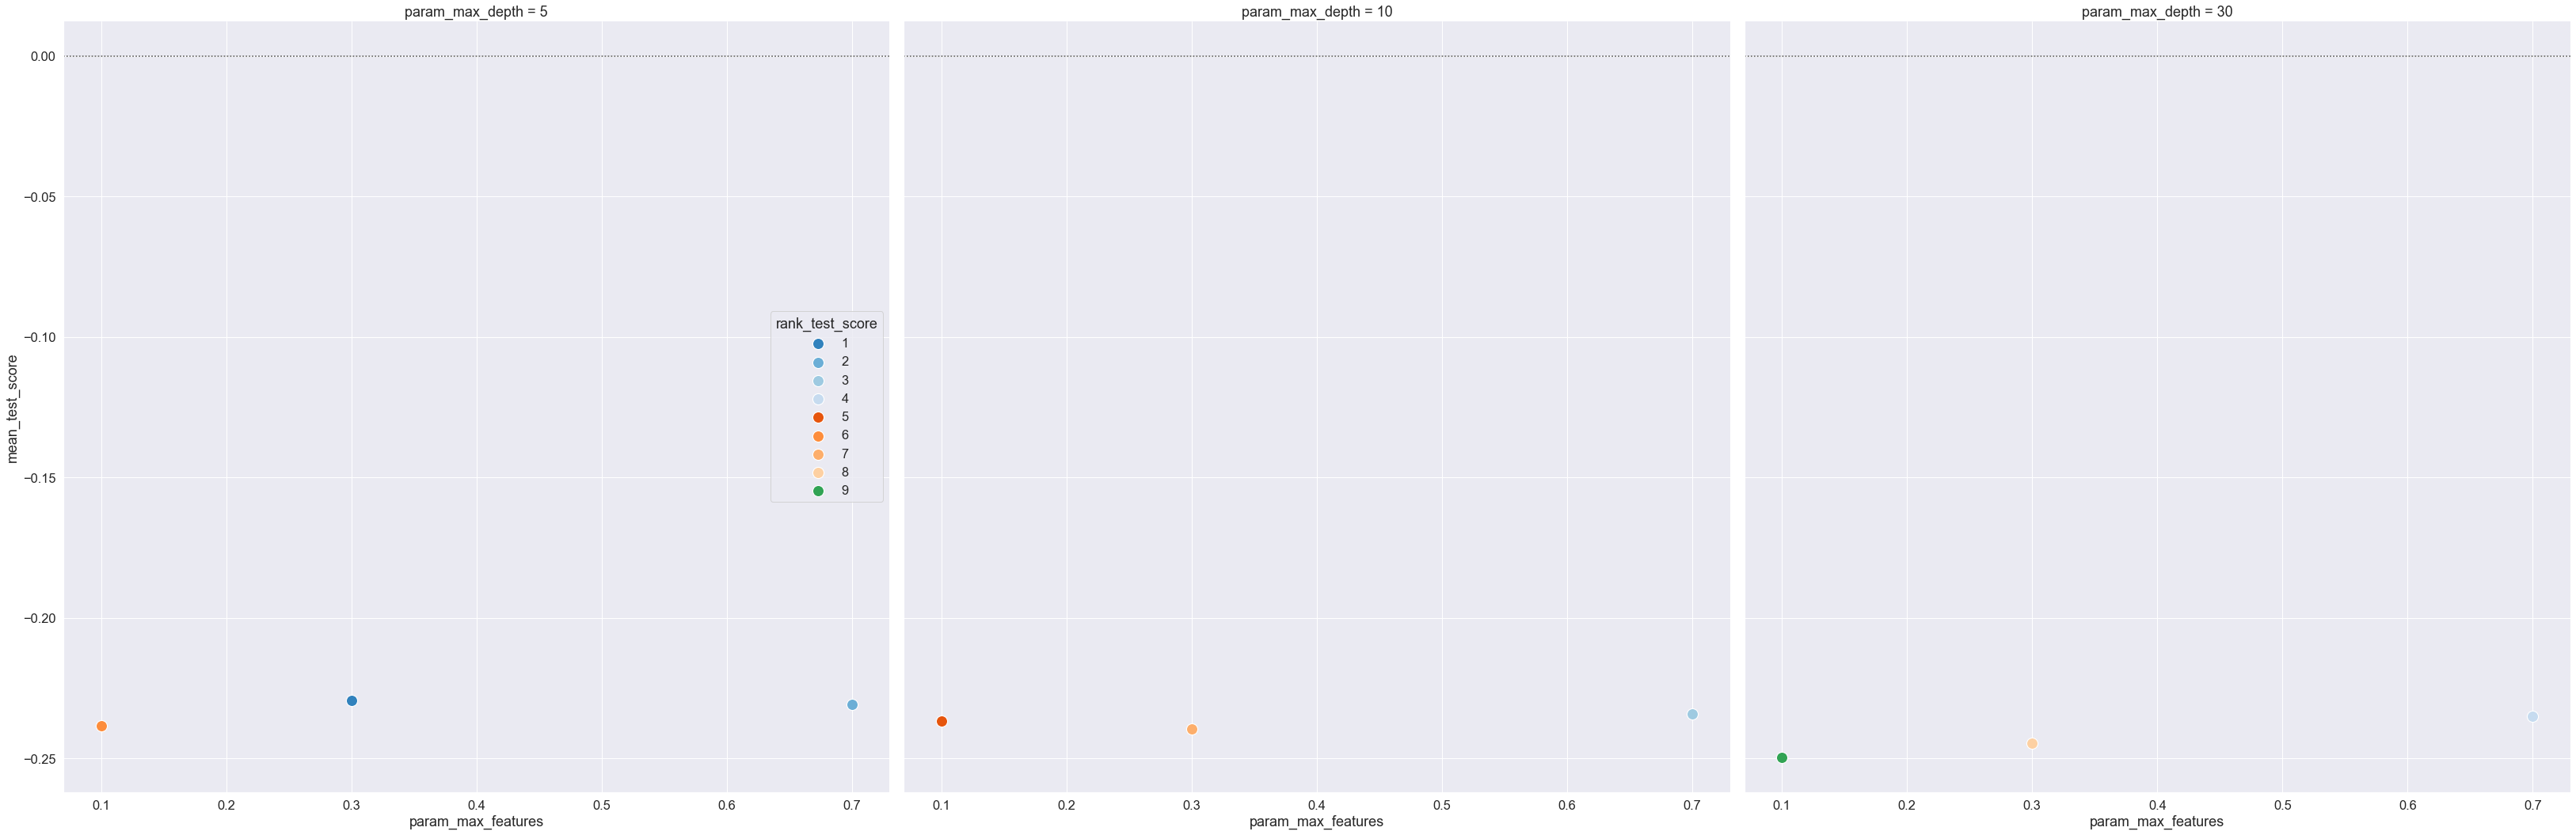

In [30]:
# Modelling

# Build a decision tree
# Set paramters for Grid Search CV
param_grid = {
    "max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],
}
model = DecisionTreeRegressor(criterion="mse", random_state=0)

Tuned_Model = model_pipeline(model, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    Tuned_Model,
    ["param_max_depth"],
    "param_max_features",
    "mean_test_score",
    "DecisionTree",
)

running model
145.984375 Seconds
finished running model


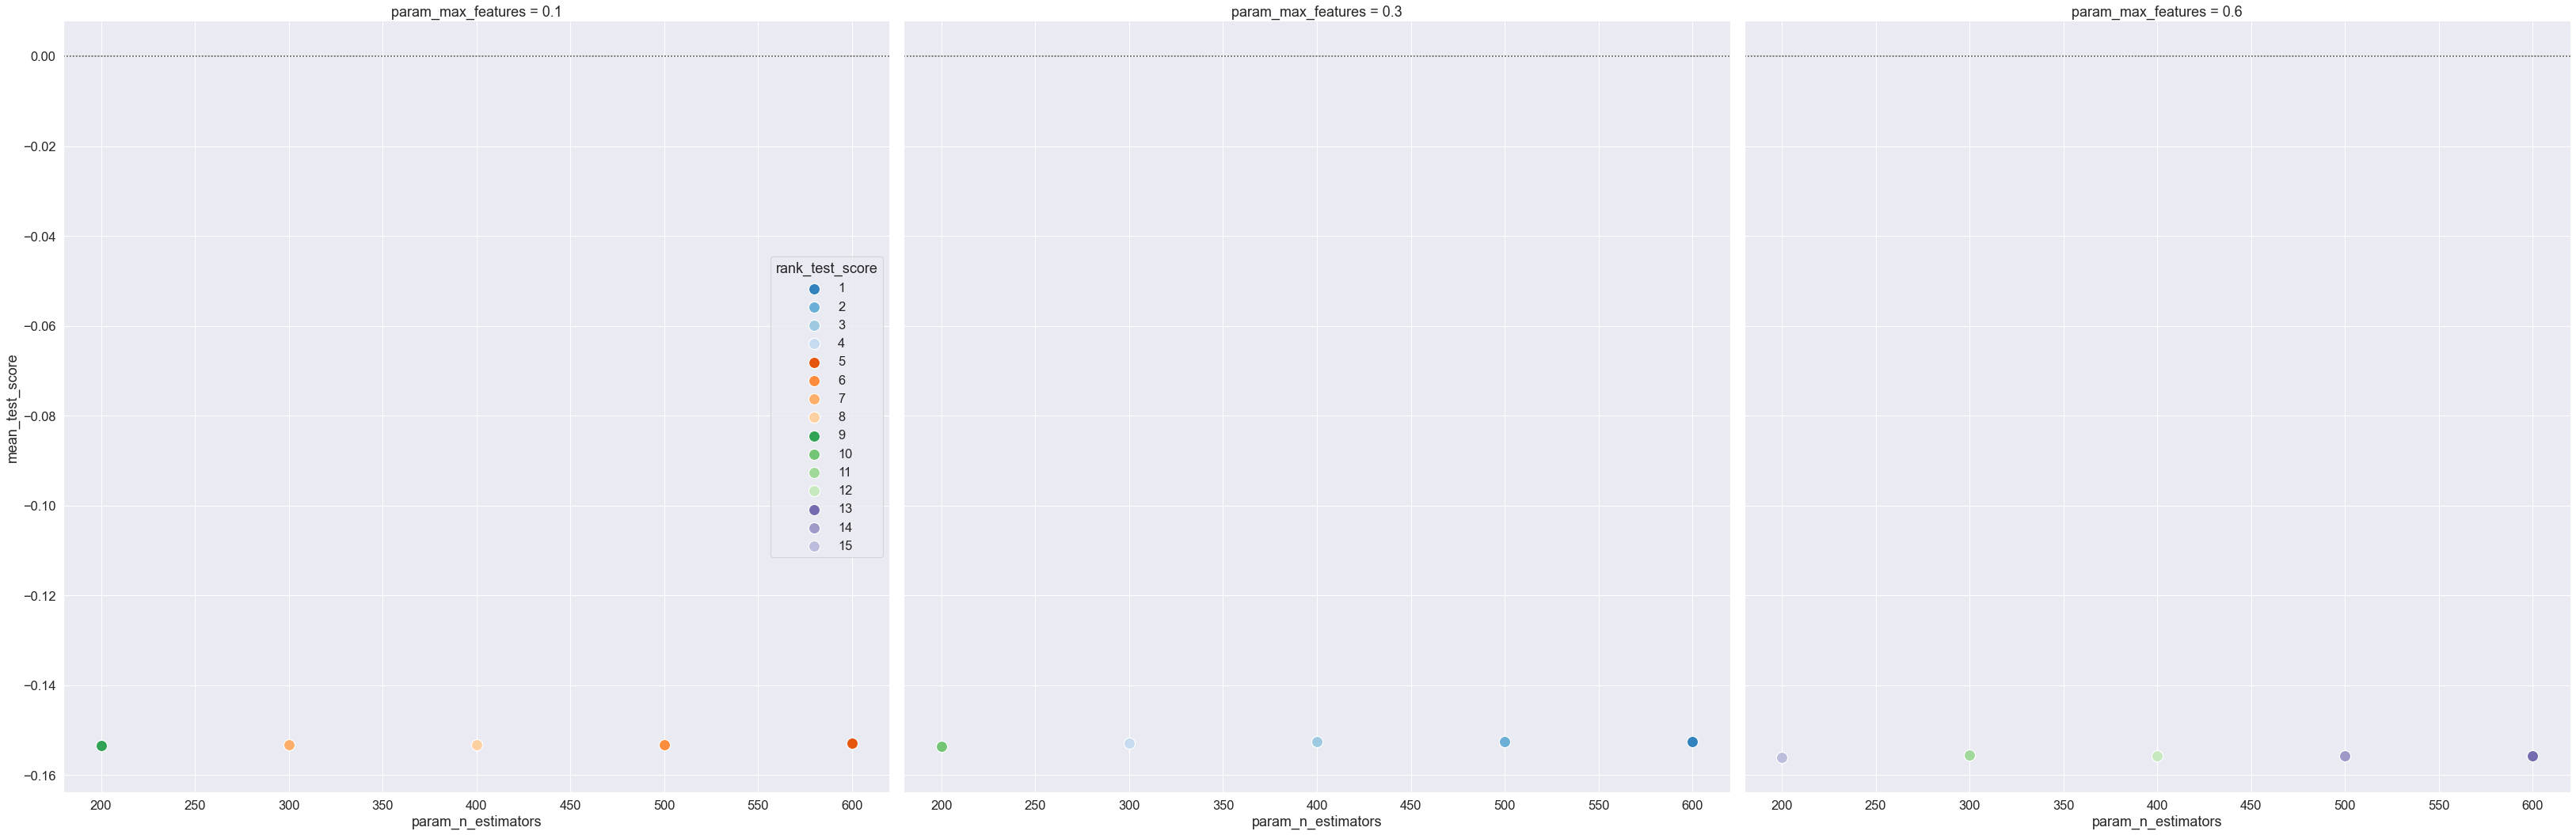

In [31]:
# Build a random forest
from sklearn.ensemble import RandomForestRegressor

# Set paramters for Grid Search
param_grid = {
    "n_estimators": [200, 300, 400, 500, 600],
    "max_features": [0.1, 0.3, 0.6],
}
# Initialise the random forest model
model2 = RandomForestRegressor(n_jobs=-1, random_state=0, bootstrap=True)

Tuned_Model2 = model_pipeline(model2, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    Tuned_Model2,
    ["param_max_features"],
    "param_n_estimators",
    "mean_test_score",
    "RandomForest",
)

In [ ]:
# Model 3: Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Set paramters for Grid Search CV
param_grid = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [5, 10, 30],
    "learning_rate": [0.01, 0.05, 0.1],
}
model3 = GradientBoostingRegressor(random_state=0, max_features="sqrt")

Tuned_Model3 = model_pipeline(model3, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    Tuned_Model3,
    ["param_max_depth", "param_learning_rate"],
    "param_n_estimators",
    "mean_test_score",
    "GradientBoosting",
)

running model
922.78125 Seconds
finished running model
